# F1 Podium Prediction

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

## Initializing Dataset

In [56]:
dfStartingPos = pd.read_csv("assets/f1db-races-starting-grid-positions.csv")
dfRaceResults = pd.read_csv("assets/f1db-races-race-results.csv")
dfDriver = pd.read_csv("assets/f1db-drivers.csv")
dfFp1 = pd.read_csv("assets/f1db-races-free-practice-1-results.csv")
dfFp2 = pd.read_csv("assets/f1db-races-free-practice-2-results.csv")
dfFp3 = pd.read_csv("assets/f1db-races-free-practice-3-results.csv")
dfRaces = pd.read_csv("assets/f1db-races.csv")

C:\Users\Molina\AppData\Local\Temp\ipykernel_23440\2880382200.py:2: DtypeWarning: Columns (30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  dfRaceResults = pd.read_csv("assets/f1db-races-race-results.csv")


Dropping other columns for simplicity.  
Columns for dfStartingPos:
- positionDisplayOrder
- driverId  

Columns for dfRaceResults: 
- raceId 
- positionDisplayOrder  
- driverId  

Columns for dfFp1,dfFp2,dfFp3:  
- positionDisplayOrder
- driverId  

Columns for dfDriver:  
- id
- name
- totalPodiums
- totalPolePositions

Columns for dfRaces:
- id
- year

In [57]:
col1 = ['raceId','positionDisplayOrder','driverId']
dfStartingPos = dfStartingPos[col1]
dfRaceResults = dfRaceResults[col1]
dfFp1 = dfFp1[col1]
dfFp2 = dfFp2[col1]
dfFp3 = dfFp3[col1]
dfDriver = dfDriver[['id','name','totalPodiums','totalPolePositions']]
dfRaces = dfRaces[['id','year','grandPrixId']]

In [61]:
dfStartingPos.rename(columns={"positionDisplayOrder":'startingPos'},inplace=True)
dfRaceResults.rename(columns={"positionDisplayOrder":'finishPos'},inplace=True)
dfFp1.rename(columns={"positionDisplayOrder":"fp1Pos"},inplace=True)
dfFp2.rename(columns={"positionDisplayOrder":"fp2Pos"},inplace=True)
dfFp3.rename(columns={"positionDisplayOrder":"fp3Pos"},inplace=True)
dfDriver.rename(columns={"id":'driverId'},inplace=True)
dfRaces.rename(columns={"id":"raceId"},inplace=True)

In [93]:
print(dfStartingPos.shape)
print(dfRaceResults.shape)
print(dfFp1.shape)
print(dfFp2.shape)
print(dfFp3.shape)
print(dfDriver.shape)
print(dfRaces.shape)

(25008, 3)
(26771, 3)
(15316, 3)
(14979, 3)
(8290, 3)
(903, 4)
(1125, 3)


In [104]:
mergedDf1 = pd.merge(dfRaceResults,dfStartingPos,on=['raceId','driverId'],how='outer')
mergedDf2 = pd.merge(mergedDf1,dfFp1,on=['raceId','driverId'],how='inner')
mergedDf3 = pd.merge(mergedDf2,dfFp2,on=['raceId','driverId'],how='inner')
mergedDf4 = pd.merge(mergedDf3,dfFp3,on=['raceId','driverId'],how='inner')


In [106]:
print(mergedDf1)
print(mergedDf1.isnull().sum())

       raceId  finishPos             driverId  startingPos
0           1         15  birabongse-bhanudej          5.0
1           1          6           bob-gerard         13.0
2           1         11   brian-shawe-taylor          NaN
3           1          7        cuth-harrison         15.0
4           1          9      david-hampshire         16.0
...       ...        ...                  ...          ...
26766    1123          7        oscar-piastri          8.0
26767    1123         20         pierre-gasly          3.0
26768    1123         10         sergio-perez         15.0
26769    1123         18      valtteri-bottas         19.0
26770    1123          9         yuki-tsunoda          7.0

[26771 rows x 4 columns]
raceId            0
finishPos         0
driverId          0
startingPos    1673
dtype: int64


In [ ]:
mergedDf5 = pd.merge(mergedDf4,dfDriver, on=['driverId'],how='inner')
df = pd.merge(mergedDf5,dfRaces,on=['raceId'],how='inner')

In [95]:
df

,raceId,finishPos,driverId,startingPos,fp1Pos,fp2Pos,fp3Pos,name,totalPodiums,totalPolePositions,year,grandPrixId
0,1.0,15.0,birabongse-bhanudej,5.0,NaN,NaN,NaN,Birabongse Bhanudej,0.0,0.0,1950.0,great-britain
1,1.0,6.0,bob-gerard,13.0,NaN,NaN,NaN,Bob Gerard,0.0,0.0,1950.0,great-britain
2,1.0,11.0,brian-shawe-taylor,NaN,NaN,NaN,NaN,Brian Shawe-Taylor,0.0,0.0,1950.0,great-britain
3,1.0,7.0,cuth-harrison,15.0,NaN,NaN,NaN,Cuth Harrison,0.0,0.0,1950.0,great-britain
4,1.0,9.0,david-hampshire,16.0,NaN,NaN,NaN,David Hampshire,0.0,0.0,1950.0,great-britain
...,...,...,...,...,...,...,...,...,...,...,...,...
27414,1124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,qatar
27415,1125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,abu-dhabi
27416,NaN,NaN,christophe-bouchut,NaN,NaN,NaN,NaN,Christophe Bouchut,0.0,0.0,NaN,NaN
27417,NaN,NaN,matteo-bobbi,NaN,NaN,NaN,NaN,Matteo Bobbi,0.0,0.0,NaN,NaN


In [96]:
df.isnull().sum()

raceId                    3
finishPos               648
driverId                  2
startingPos            2321
fp1Pos                12103
fp2Pos                12440
fp3Pos                19129
name                      2
totalPodiums              2
totalPolePositions        2
year                      3
grandPrixId               3
dtype: int64

In [80]:
df.describe()

,raceId,finishPos,startingPos,fp1Pos,fp2Pos,fp3Pos,totalPodiums,totalPolePositions,year
count,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000,7697.000000
mean,903.377290,10.938418,10.921268,11.150838,11.172535,10.884371,41.232818,14.053917,2013.626998
std,115.859346,6.149967,6.147616,6.291947,6.343335,6.136517,52.492749,24.152250,5.986277
min,706.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2003.000000
25%,806.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,0.000000,2009.000000
50%,897.000000,11.000000,11.000000,11.000000,11.000000,11.000000,19.000000,3.000000,2013.000000
75%,999.000000,16.000000,16.000000,16.000000,16.000000,16.000000,62.000000,18.000000,2019.000000
max,1123.000000,24.000000,24.000000,28.000000,29.000000,24.000000,202.000000,104.000000,2024.000000


## Corr. Matrix

<Axes: >

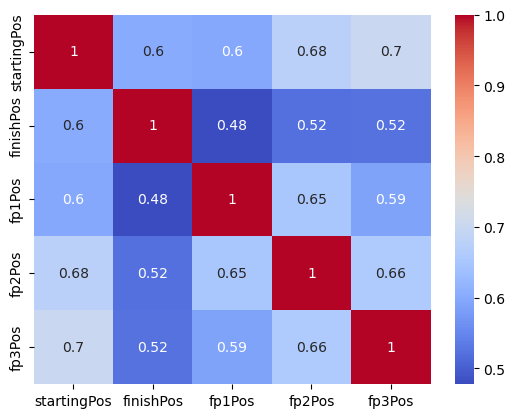

In [85]:
corr_matrix =df[['startingPos','finishPos','fp1Pos','fp2Pos','fp3Pos']].corr()
sns.heatmap(corr_matrix,annot = True, cmap='coolwarm')

## Model Training